In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from prophet import Prophet


In [2]:
df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


<AxesSubplot: xlabel='Date'>

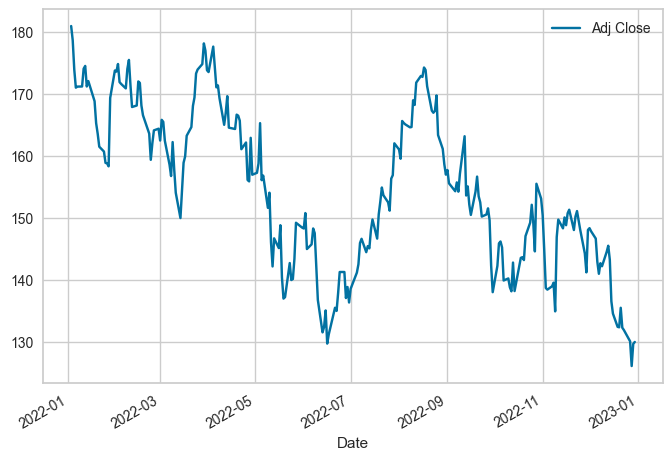

In [29]:
df.plot()

In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df = df[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,2022-01-03,180.959732
1,2022-01-04,178.663071
2,2022-01-05,173.910660
3,2022-01-06,171.007492
4,2022-01-07,171.176529


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.index = df['Date']
del df['Date']
df.head()

/var/folders/wk/1__f0f457zs4shb5sgjd_4x40000gn/T/ipykernel_37446/3768398149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529


In [7]:
df_interpol = df.resample('D').interpolate(method='time')
df_interpol

,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529
...,...
2022-12-26,130.487500
2022-12-27,130.029999
2022-12-28,126.040001


In [8]:
df_interpol.sort_index(inplace=True)

In [9]:
n = int(len(df_interpol)*0.9)
train = df_interpol[:n]
test = df_interpol[n:]

display(train.tail(), test.head())

,Adj Close
Date,
2022-11-19,150.196660
2022-11-20,149.103328
2022-11-21,148.009995
2022-11-22,150.179993
2022-11-23,151.070007


,Adj Close
Date,
2022-11-24,149.590004
2022-11-25,148.110001
2022-11-26,146.813334
2022-11-27,145.516668
2022-11-28,144.220001


In [11]:
from pycaret.time_series import *

In [13]:
exp = setup(data=train, target='Adj Close', session_id=123, fh=37)

,Description,Value
0,session_id,123
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(325, 1)"
5,Transformed data shape,"(325, 1)"
6,Transformed train set shape,"(288, 1)"
7,Transformed test set shape,"(37, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# df_interpol.plot(figsize=(12,6))

In [ ]:
# df_interpol = data['Adj Close'].astype(float).interpolate(method='time')
# df_interpol

In [14]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,325.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,155.88651
3,Summary,Statistics,Transformed,Median,,155.551956
4,Summary,Statistics,Transformed,Standard Deviation,,12.100566
5,Summary,Statistics,Transformed,Variance,,146.423688
6,Summary,Statistics,Transformed,Kurtosis,,-1.055756
7,Summary,Statistics,Transformed,Skewness,,-0.065611
8,Summary,Statistics,Transformed,# Distinct Values,,319.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3955.849444


In [15]:
top10 = compare_models(
    turbo=False,
    n_select=10,
    sort='RMSE'
)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.0554,1.0723,9.0540,10.6432,0.0584,0.0615,-1.7098,0.4533
arima,ARIMA,1.1284,1.1503,9.6803,11.3976,0.0634,0.0652,-1.7647,0.4167
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1432,1.1531,9.7995,11.4071,0.0634,0.0654,-1.6412,0.2667
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.1924,1.1568,10.2431,11.4720,0.0675,0.0696,-1.8557,0.2733
grand_means,Grand Means Forecaster,1.1663,1.1762,10.0039,11.6045,0.0668,0.0648,-1.7376,0.3400
theta,Theta Forecaster,1.2009,1.1960,10.3162,11.8462,0.0680,0.0690,-1.9526,0.0233
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.1693,1.1970,10.0391,11.8676,0.0655,0.0679,-2.0308,0.3267
auto_arima,Auto ARIMA,1.2027,1.2007,10.3301,11.8749,0.0684,0.0684,-1.9342,0.4533
naive,Naive Forecaster,1.2027,1.2007,10.3301,11.8749,0.0684,0.0684,-1.9342,1.2300
snaive,Seasonal Naive Forecaster,1.2406,1.2484,10.6378,12.3354,0.0695,0.0708,-2.0115,0.3667


In [16]:
exp.plot_model(plot='train_test_split')

In [17]:
for model in top10:
    exp.plot_model(model)

In [19]:
arima = exp.create_model('arima', fold=3)
plot_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-06-28,1.8856,1.8682,16.2284,18.7230,0.1055,0.1133,-4.5975
1,2022-08-04,0.7621,0.8033,6.4459,7.8055,0.0401,0.0393,-0.4466
2,2022-09-10,0.7375,0.7794,6.3666,7.6644,0.0445,0.0432,-0.2499
Mean,NaT,1.1284,1.1503,9.6803,11.3976,0.0634,0.0652,-1.7647
SD,NaT,0.5355,0.5077,4.6303,5.1801,0.0299,0.0340,2.0047


In [20]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  288
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 13)   Log Likelihood                -737.386
Date:                            Fri, 27 Jan 2023   AIC                           1480.771
Time:                                    16:19:14   BIC                           1491.621
Sample:                                01-03-2022   HQIC                          1485.126
                                     - 10-17-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1484      0.209     -0.711      0.477      -0.558       0.261
ar.L1          0.9259      0.024     37.817      0.000       0.878       0.974
sigma2        12.4008      0.836     14.832      0.000      10.762      14.039
===================================================================================
Ljung-Box (L1) (Q):                   4.13   Jarque-Bera (JB):                43.44
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.33
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
arima.get_params()

{'concentrate_scale': False,
 'enforce_invertibility': True,
 'enforce_stationarity': True,
 'hamilton_representation': False,
 'maxiter': 50,
 'measurement_error': False,
 'method': 'lbfgs',
 'mle_regression': True,
 'order': (1, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 1, 0, 13),
 'simple_differencing': False,
 'start_params': None,
 'suppress_warnings': False,
 'time_varying_regression': False,
 'trend': None,
 'with_intercept': True}

In [27]:
tuned_arima = exp.tune_model(arima, optimize='RMSE')
plot_model(tuned_arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-06-28,0.8361,0.8752,7.1960,8.7715,0.0464,0.0480,-0.2285
1,2022-08-04,0.6287,0.6355,5.3172,6.1748,0.0326,0.0324,0.0947
2,2022-09-10,1.5342,1.5048,13.2434,14.7973,0.0923,0.0872,-3.6590
Mean,NaT,0.9997,1.0052,8.5855,9.9145,0.0571,0.0559,-1.2643
SD,NaT,0.3873,0.3666,3.3817,3.6117,0.0255,0.0230,1.6984


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.3s finished


In [24]:
prophet = exp.create_model('prophet', fold=3)
plot_model(prophet)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-06-28,2.6716,2.5690,22.9933,25.7464,0.1498,0.1649,-9.5847
1,2022-08-04,1.2436,1.3650,10.5179,13.2640,0.0659,0.0629,-3.1772
2,2022-09-10,3.3337,3.1069,28.7775,30.5511,0.1993,0.1790,-18.8599
Mean,NaT,2.4163,2.3470,20.7629,23.1872,0.1383,0.1356,-10.5406
SD,NaT,0.8722,0.7283,7.6194,7.2858,0.0551,0.0517,6.4380


In [26]:
prophet.get_params()

{'add_country_holidays': None,
 'add_seasonality': None,
 'alpha': 0.05,
 'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'changepoints': None,
 'daily_seasonality': 'auto',
 'freq': None,
 'growth': 'linear',
 'growth_cap': None,
 'growth_floor': 0.0,
 'holidays': None,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'n_changepoints': 25,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'stan_backend': None,
 'uncertainty_samples': 1000,
 'verbose': 0,
 'weekly_seasonality': 'auto',
 'yearly_seasonality': 'auto'}

In [28]:
tuned_prophet = exp.tune_model(prophet, optimize='RMSE')
plot_model(tuned_prophet)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-06-28,1.8053,1.8531,15.5375,18.5713,0.1004,0.1079,-4.5072
1,2022-08-04,2.9806,2.6534,25.2084,25.7829,0.1525,0.1655,-14.7835
2,2022-09-10,0.6278,0.6711,5.4193,6.5987,0.0360,0.0367,0.0735
Mean,NaT,1.8046,1.7259,15.3884,16.9843,0.0963,0.1034,-6.4057
SD,NaT,0.9605,0.8143,8.0795,7.9119,0.0476,0.0527,6.2122


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s finished


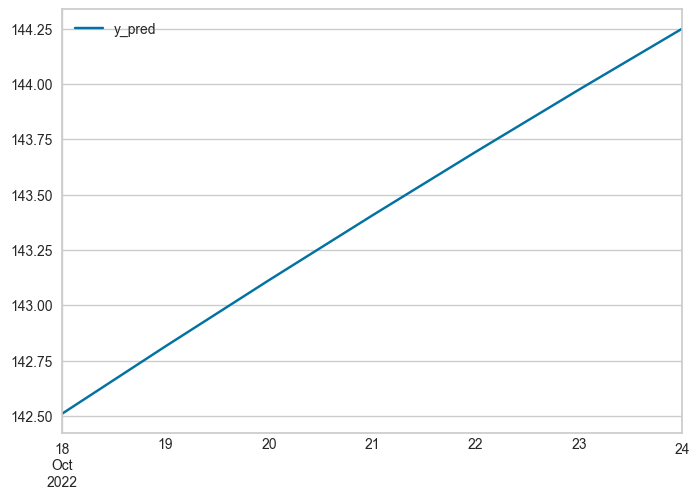

In [31]:
pred_arima = predict_model(tuned_arima, fh=7)

ax = pred_arima.plot()
